In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


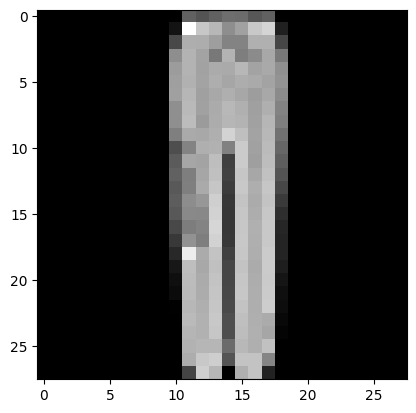

In [ ]:
test = x_train[1000]
plt.imshow(test, cmap = 'gray')
plt.show()

In [ ]:
#Pre-process
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
#Make sure input shape = 28*28*1
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [ ]:
print("x_train shape: ", x_train.shape)
print(x_train.shape[0], " - Train samples")
print(x_test.shape[0], " - Test samples")


x_train shape:  (60000, 28, 28, 1)
60000  - Train samples
10000  - Test samples


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
y_train[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape = input_shape),
     layers.Conv2D(32, kernel_size=(3,3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes, activation="softmax")
    ]
)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1600)             

In [ ]:
batch_size = 128
epochs = 20

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 3s 5ms/step - loss: 0.7012 - accuracy: 0.7454 - val_loss: 0.4577 - val_accuracy: 0.8350
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.4585 - accuracy: 0.8349 - val_loss: 0.3924 - val_accuracy: 0.8640
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.4048 - accuracy: 0.8553 - val_loss: 0.3623 - val_accuracy: 0.8672
Epoch 4/20
422/422 [==============================] - 2s 5ms/step - loss: 0.3752 - accuracy: 0.8661 - val_loss: 0.3394 - val_accuracy: 0.8790
Epoch 5/20
422/422 [==============================] - 2s 5ms/step - loss: 0.3566 - accuracy: 0.8721 - val_loss: 0.3149 - val_accuracy: 0.8872
Epoch 6/20
422/422 [==============================] - 2s 5ms/step - loss: 0.3386 - accuracy: 0.8797 - val_loss: 0.3095 - val_accuracy: 0.8858
Epoch 7/20
422/422 [==============================] - 2s 5ms/step - loss: 0.3228 - accuracy: 0.8836 - val_loss: 0.2997 - val_accuracy: 0.8923
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.0280142892152071
Test accuracy:  0.9907000064849854
